In [1]:
import pandas as pd
from IPython.display import display, HTML
from lr.text_processing.util import pre_process_nli_df
from lr.training.util import filter_df_by_label
import numpy as np
import matplotlib.pyplot as plt


In [2]:
original_path = "data/snli/train.csv" 
transformed_path = "data/snli/train_p_h_syn_noun.csv"

df = pd.read_csv(original_path)
df = filter_df_by_label(df.dropna()).reset_index(drop=True)
pre_process_nli_df(df)
df_t = pd.read_csv(transformed_path)

n = 740 | e_n = 5.0%


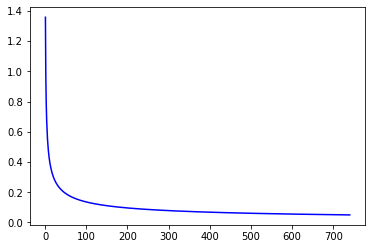

In [3]:
def e(alpha, n):
    return np.sqrt(np.log(2/alpha) / (2*n))

e95 = lambda n: e(0.05, n)
x = np.array(range(1,741))

plt.plot(x, e95(x),color="blue");
p = np.random.uniform(0.5,1)
eps = e95(x)
n = eps.argmin()
e_id = eps[n]


print("n = {} | e_n = {:.1%}".format(x[n], e_id))

In [4]:
samples = 1000
good = []
bad = []
count = 0

for _ in range(samples):
    count += 1
    original = df.sample()
    id_ = original.index[0]
    print("\noriginal\n")
    display(HTML(original.to_html()))
    modified = df_t.loc[id_].to_frame().transpose()
    print("\nmodified\n")
    display(HTML(modified.to_html()))
    print("\ndecide\n")
    decision = input()
    if decision == "y":
        good.append(id_)
    elif decision =="n":
        bad.append(id_)
    else:
        break


original



,premise,hypothesis,label
324469,one man walks past a building while another sits in front of the building on a stoop,a man is playing dance dance revolution,contradiction



modified



,premise,hypothesis,label
324469,one adult male walks past a building while another sits in front of the building on a stoop,a adult male is playing dance dance revolution,contradiction



decide



 y



original



,premise,hypothesis,label
280808,a darkhaired boy in sunglasses is jumping,a boy weariing sunglasses is jumping,entailment



modified



,premise,hypothesis,label
280808,a darkhaired male child in shades is jumping,a male child weariing shades is jumping,entailment



decide



 y



original



,premise,hypothesis,label
400789,a group of bicycle racers rounds a turn on an asphalt street as spectators watch from behind temporary barriers,the asphalt is hot,neutral



modified



,premise,hypothesis,label
400789,a group of bike racers rounds a bend on an asphalt street as viewer watch from behind temporary barriers,the asphalt is hot,neutral



decide



 h


## CI

In [5]:
n =  count-1
g = len(good) / n
print("count = {}\n".format(count))
print("len(good) = {}\n".format(len(good)))
print("good pct = {:.3f}\n".format(g))


count = 3

len(good) = 2

good pct = 1.000



In [8]:
all_ns = [38, 23, 15, 19, 17, 10,
          13, 12, 11, 19, 30, 29,
          14, 18, 11, 7, 10, 13,
          17, 10, 22, 14, 14, 14]

all_good = [27, 21, 12, 17, 13,
            8, 11, 10, 9, 16, 26,
            27, 10, 16, 9, 6, 8, 11,
            14, 8, 19, 10, 11, 10]

assert len(all_ns) == len(all_good)

n = np.sum(all_ns)
g = np.sum(all_good)
pct = g / n

# n=400
# n=510


l = pct - e95(n)
u = pct + e95(n) 

print("count = {}\n".format(n))
print("good pct = {:.1%}\n".format(pct))
print("e95 = {:.2%}\n".format(e95(n)))
print("good 95% pct CI = ({:.1%}, {:.1%})\n".format(l,u))


count = 400

good pct = 82.2%

e95 = 6.79%

good 95% pct CI = (75.5%, 89.0%)



## IDS

In [7]:
# check = [239334]
# good + bad